In [48]:
# Importing modules
import pandas as pd
from pandas.api.types import is_string_dtype
import re
import sklearn
from nltk.tokenize import word_tokenize

#plotting packages
import seaborn as sns
import matplotlib.pyplot as plt

# #NLP packages
# import sklearn
# from nltk.tokenize import word_tokenize
# from sklearn.feature_extraction.text import CountVectorizer
# import numpy as np


In [49]:
# Read tudentReflectionStrategy.csv into reflections
reflections = pd.read_csv('StudentReflectionStrategy.csv')

# Print out the first rows of papers
ref_15 = reflections[15:16]['content']

for index, value in ref_15.items():
    print("Index : {}, Value : {}".format(index, value))

Index : 15, Value : I knew the answers and I actually thought about them😀😜


In [50]:
reflections.drop_duplicates(subset =["content","top_1_score", "top_2_score"], 
                     keep = 'first', inplace = True) 

In [51]:
reflections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104350 entries, 0 to 184834
Data columns (total 4 columns):
UseCase        104350 non-null int64
content        104350 non-null object
top_1_score    104350 non-null int64
top_2_score    104350 non-null int64
dtypes: int64(3), object(1)
memory usage: 4.0+ MB


In [52]:
is_string_dtype(reflections['content'])

True

In [53]:
ref = reflections['content']
ref.head()

0    I looked back and read all of the problems car...
1       I did things like the test told me to do them.
2     I took notes in my notebook to study them later.
3    looking at the image and drawing it. I am leas...
4    I just improved in all of my post-assessments ...
Name: content, dtype: object

In [54]:
ref_list=[]
for i in ref:
    i = re.sub('[\W_]+', ' ', i)
    ref_list.append(i)
len(ref_list)

104350

In [55]:
ref_list[15]

'I knew the answers and I actually thought about them '

In [56]:
ref_token = [word_tokenize(i) for i in ref_list]

In [57]:
ref_list[1]

'I did things like the test told me to do them '

In [58]:
ref_token[1]

['I', 'did', 'things', 'like', 'the', 'test', 'told', 'me', 'to', 'do', 'them']

In [60]:
ref_token_counts = [len(i) for i in ref_token]
#ref_token_counts


In [61]:
reflections['content_token']=ref_token

In [62]:
reflections['token_counts']=ref_token_counts
reflections.drop(['UseCase'], axis = 1, inplace=True)

In [63]:
reflections.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 104350 entries, 0 to 184834
Data columns (total 5 columns):
content          104350 non-null object
top_1_score      104350 non-null int64
top_2_score      104350 non-null int64
content_token    104350 non-null object
token_counts     104350 non-null int64
dtypes: int64(3), object(2)
memory usage: 4.8+ MB


In [64]:
reflections.head()

,content,top_1_score,top_2_score,content_token,token_counts
0,I looked back and read all of the problems car...,2,3,"[I, looked, back, and, read, all, of, the, pro...",10
1,I did things like the test told me to do them.,2,3,"[I, did, things, like, the, test, told, me, to...",11
2,I took notes in my notebook to study them later.,2,3,"[I, took, notes, in, my, notebook, to, study, ...",10
3,looking at the image and drawing it. I am leas...,3,2,"[looking, at, the, image, and, drawing, it, I,...",22
4,I just improved in all of my post-assessments ...,3,2,"[I, just, improved, in, all, of, my, post, ass...",27


In [65]:
len(ref_token_counts)

104350

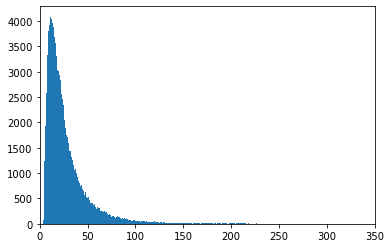

In [66]:
import matplotlib.pyplot as plt
#%matplotlib inline
plt.hist(ref_token_counts, 10000)
plt.xlim((0,350))

plt.show()

In [67]:
plt.show()

In [68]:
sum(i > 250 for i  in ref_token_counts )

50

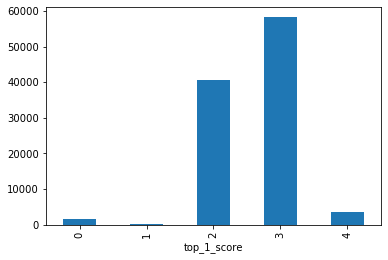

In [69]:
# Group the papers by year
groups = reflections.groupby('top_1_score')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

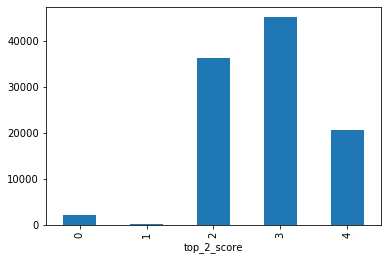

In [70]:
# Group the papers by year
groups = reflections.groupby('top_2_score')

# Determine the size of each group
counts = groups.size()

# Visualise the counts as a bar plot
import matplotlib.pyplot
%matplotlib inline
counts.plot(kind='bar')

In [71]:
# Remove punctuation
reflections['content_processed'] = reflections['content'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
reflections['content_processed'] = reflections['content_processed'].str.lower()

# Print the processed titles of the first rows 
print(reflections['content_processed'].head())

0    i looked back and read all of the problems car...
1        i did things like the test told me to do them
2      i took notes in my notebook to study them later
3    looking at the image and drawing it i am least...
4    i just improved in all of my post-assessments ...
Name: content_processed, dtype: object


IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



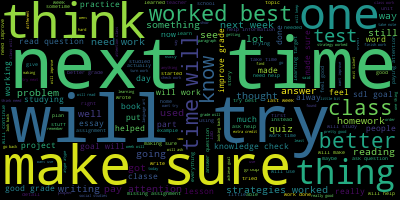

In [72]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string=" ".join(reflections['content_processed'])
print(long_string)
# Create a WordCloud object
wordcloud = WordCloud()

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

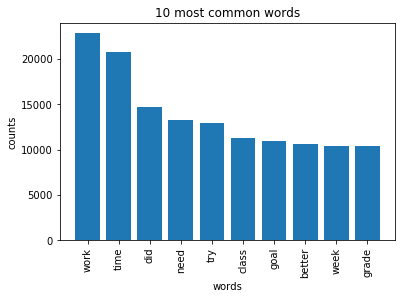

In [73]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 

    plt.bar(x_pos, counts,align='center')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.title('10 most common words')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(reflections['content_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)